In [36]:
# dataFrame based on demoGraphics
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd
import random

In [38]:
# Sample feedback for demonstration
feedback_samples = [
    "The network connection is really slow.",
    "I faced an outage for three hours yesterday.",
    "The customer support was really helpful.",
    "Billing issues! Charged me extra this month.",
    "Altice has the best internet service.",
    "The installation process was smooth.",
    "I'm not satisfied with the customer service response.",
    "Why does my connection drop so frequently?",
    "There are hidden charges in my bill!",
    "I'd recommend Altice to everyone."
]

channels = ["customer_support", "social_media", "audio_transcripts"]

# Generate dummy data
data = {
    "complaints": [random.choice(feedback_samples) for _ in range(100)],
    "Channel": [random.choice(channels) for _ in range(100)]
}

df = pd.DataFrame(data)

df.head()


,complaints,Channel
0,I'd recommend Altice to everyone.,audio_transcripts
1,The network connection is really slow.,audio_transcripts
2,There are hidden charges in my bill!,social_media
3,There are hidden charges in my bill!,social_media
4,Why does my connection drop so frequently?,customer_support


# Text Cleaning or Text Pre-processiong

In [39]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from langdetect import detect

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # 2. Convert to lowercase
    text = text.lower()
    
    # 7. Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    
    # 9. Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # 8. Remove special characters (excluding space)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 10. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 1. Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # 5. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 11. Remove extra whitespaces
    text = " ".join(tokens)
    
    # 12. Sentence segmentation
    sentences = sent_tokenize(text)
    
    # 13. Language detection (just an example, you might need a more robust solution)
    lang = detect(text)
    
    # 14. Code switching detection (not implementing as it's quite involved and requires additional tools)
    # 15. N-gram generation (example for bigrams; you can adjust for other n-grams)
    bigrams = list(nltk.bigrams(tokens))
    
    # 16. Noise reduction (not implementing as it's specific to the dataset and might need manual rules)
    
    # Rejoining cleaned tokens to form the cleaned text
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text, lang, bigrams

# Example:
text = "Your sample text with <html> tags </html> and https://example.com URLs."
cleaned_text, detected_lang, generated_bigrams = preprocess_text(text)

print(f"Cleaned Text: {cleaned_text}")
print(f"Detected Language: {detected_lang}")
print(f"Generated Bigrams: {generated_bigrams}")


Cleaned Text: sampl text tag url
Detected Language: sv
Generated Bigrams: [('sampl', 'text'), ('text', 'tag'), ('tag', 'url')]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator.DESKTOP-
[nltk_data]     QSF3VEN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
# Assuming the function preprocess_text is already defined as above and df is our dataframe

# Applying the function to our dataframe's "complaints" column
df['cleaned_text'] = df['complaints'].apply(lambda x: preprocess_text(x)[0])

# If you're interested in capturing detected language and bigrams as well:
df['detected_lang'] = df['complaints'].apply(lambda x: preprocess_text(x)[1])
df['bigrams'] = df['complaints'].apply(lambda x: preprocess_text(x)[2])

df.head()

,complaints,Channel,cleaned_text,detected_lang,bigrams
0,I'd recommend Altice to everyone.,audio_transcripts,id recommend altic everyon,en,"[(id, recommend), (recommend, altic), (altic, ..."
1,The network connection is really slow.,audio_transcripts,network connect realli slow,en,"[(network, connect), (connect, realli), (reall..."
2,There are hidden charges in my bill!,social_media,hidden charg bill,cy,"[(hidden, charg), (charg, bill)]"
3,There are hidden charges in my bill!,social_media,hidden charg bill,cy,"[(hidden, charg), (charg, bill)]"
4,Why does my connection drop so frequently?,customer_support,connect drop frequent,fr,"[(connect, drop), (drop, frequent)]"


In [41]:
# processed_data = df['cleaned_text'].tolist()

# EDA for Text

# 1. Word Distributions

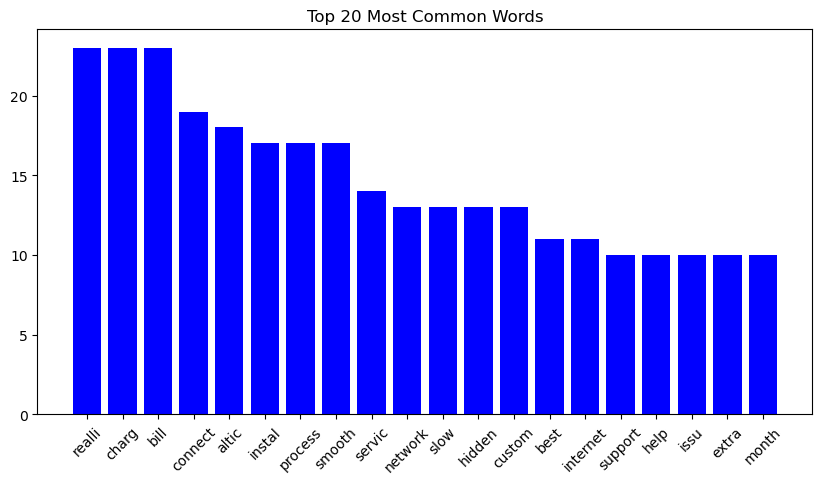

In [42]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Tokenizing the cleaned text
tokens = [word for row in df['cleaned_text'] for word in nltk.word_tokenize(row)]
word_freq = Counter(tokens)

# Plotting the top 20 most common words
common_words = word_freq.most_common(20)
words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(10,5))
plt.bar(words, counts, color='blue')
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.show()


# 2 N-gram Analysis

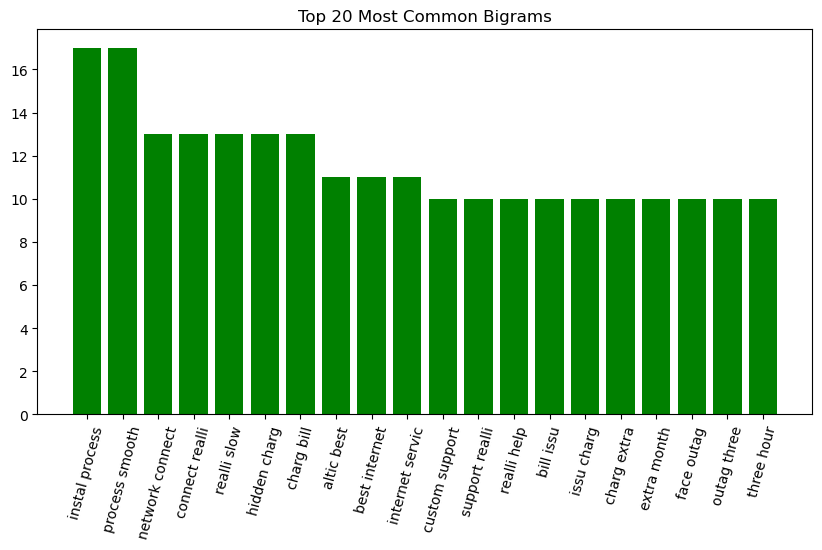

In [43]:
bigrams = nltk.bigrams(tokens)
bigram_freq = Counter(bigrams)

common_bigrams = bigram_freq.most_common(20)
bigrams = [' '.join(bigram[0]) for bigram in common_bigrams]
counts = [bigram[1] for bigram in common_bigrams]

plt.figure(figsize=(10,5))
plt.bar(bigrams, counts, color='green')
plt.title('Top 20 Most Common Bigrams')
plt.xticks(rotation=75)
plt.show()


# 3. Sparsity Visualizations

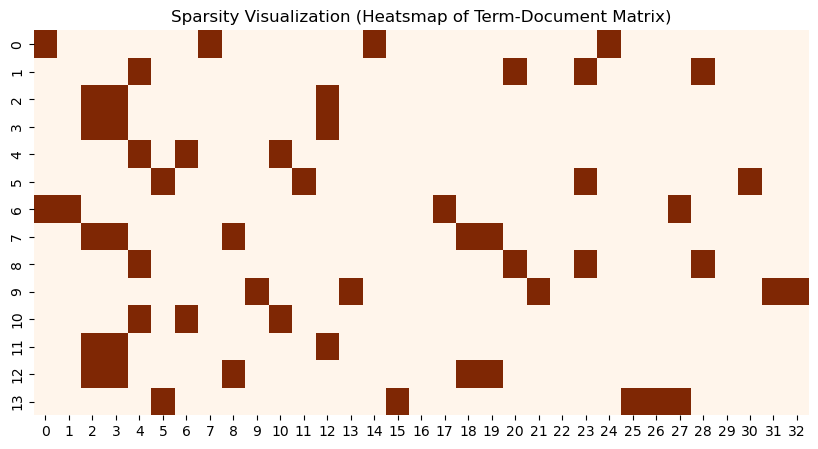

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

# Visualizing the sparsity
plt.figure(figsize=(10,5))
sns.heatmap(X.toarray()[:14], cmap='Oranges', cbar=False)
plt.title('Sparsity Visualization (Heatsmap of Term-Document Matrix)')
plt.show()


# 4 TF_IDF visualization

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can set max_features to limit the number of columns in the matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])


# LDA using --- Word Vectors using Count VBetcorizer 

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.split())
processed_data = df['cleaned_text']


In [ ]:
# Create a dictionary representation of the documents:

import gensim
from gensim import corpora
from gensim.models import LdaModel

dictionary = corpora.Dictionary(processed_data)

In [ ]:
# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)

# Convert the list of processed reviews to a bag of words corpus using the dictionary prepared above:
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

# Initialize and train the LDA model:
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# For visualization with pyLDAvis

In [47]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare LDA visualization.
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# Metrics

In [ ]:
1. Perplexity 
2. Coherence Score

In [49]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. Lower the better.



Perplexity:  -2.812240512462756


In [50]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score (c_v): ', coherence_lda)



Coherence Score (c_v):  0.6472541663734047
